[*********************100%***********************]  1 of 1 completed

Final Capital: $5000.00


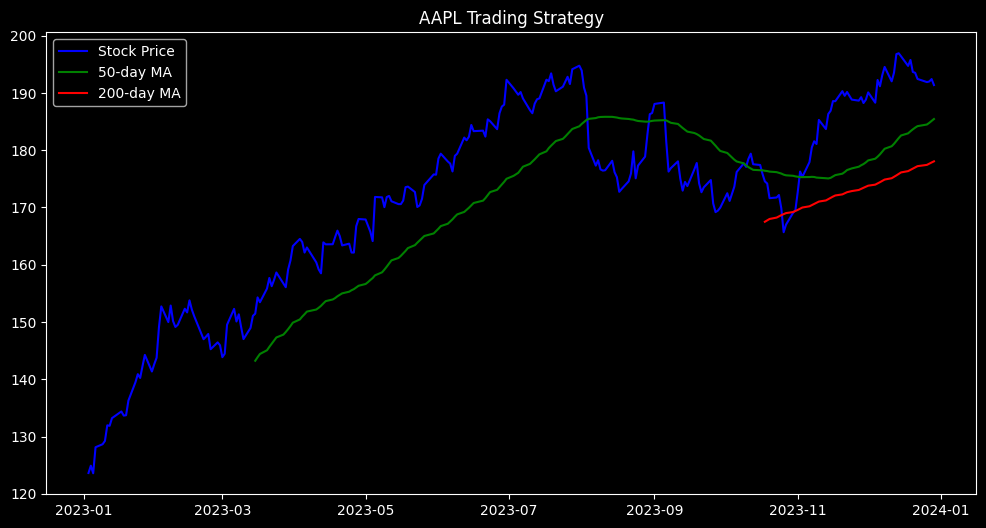

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define stock and time range
stock_symbol = "AAPL"  # Change as needed
start_date = "2023-01-01"
end_date = "2024-01-01"

# Fetch historical data
data = yf.download(stock_symbol, start=start_date, end=end_date)
data['50_MA'] = data['Close'].rolling(window=50).mean()
data['200_MA'] = data['Close'].rolling(window=200).mean()
data['RSI'] = 100 - (100 / (1 + data['Close'].pct_change().rolling(14).mean() / data['Close'].pct_change().rolling(14).std()))

def backtest_strategy(data, initial_capital=5000, risk_per_trade=0.02, reward_target=2):
    capital = initial_capital
    trades = []
    position = None
    
    for i in range(200, len(data)):
        price = data['Close'].iloc[i]
        
        # Entry Condition: Momentum Breakout + Golden Cross + RSI Confirmation
        if position is None:
            if data['50_MA'].iloc[i] > data['200_MA'].iloc[i] and data['RSI'].iloc[i] > 60:
                position = price  # Enter trade
                stop_loss = price * (1 - risk_per_trade)  # 2% risk per trade
                take_profit = price * (1 + (risk_per_trade * reward_target))  # 4% profit target
                
        # Exit Condition: Profit target or Stop-loss hit
        elif position is not None:
            if price >= take_profit or price <= stop_loss:
                gain = (price - position) * 10  # Assuming 10 shares per trade
                capital += gain
                trades.append({'Entry': position, 'Exit': price, 'Gain': gain})
                position = None  # Reset trade
    
    return capital, trades

# Run backtest
final_capital, trade_history = backtest_strategy(data)
trade_df = pd.DataFrame(trade_history)


print(f"Final Capital: ${final_capital:.2f}")

# Plot stock price and moving averages
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label='Stock Price', color='blue')
plt.plot(data.index, data['50_MA'], label='50-day MA', color='green')
plt.plot(data.index, data['200_MA'], label='200-day MA', color='red')
plt.legend()
plt.title(f"{stock_symbol} Trading Strategy")
plt.show()